# **Preprocesamiento y recomandador**

En este notebook, trabajamos con los datos almacenados en la base de datos para desarrollar un recomendador de ofertas de empleo basado en habilidades técnicas (hard skills), nivel de inglés y años de experiencia laboral del usuario. A partir de las habilidades requeridas en las ofertas y una lista de habilidades proporcionadas por el usuario, el sistema identificará y recomendará las ofertas que mejor se ajusten a su perfil.


In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import pandas as pd
import numpy as np
import pickle
import sys

import warnings
warnings.filterwarnings("ignore")

sys.path.append("../")

from src import funciones_recomendador as f_recomendador

load_dotenv()

True

Para comenzar el recomendador lo más importante es en base a qué vamos a recomendar, en este caso de ejemplo vamos a poner que el usuario tiene una lista de skills predeterminadas. Llamaremos a la función que cargará todos los datos de las colecciones de nuestra base de datos en un dataframe y añadiremos una fila con el _id=0 y skills_valoradas las que hay en la lista.

In [2]:
skills_usuario = ["Excel", 'Tableau', 'ETL', 'Power BI', 'Data Visualization tools', 'Python']
df = f_recomendador.matriz_skills_ofertas_mas_usuario(skills_usuario)

Pinged your deployment. You successfully connected to MongoDB!
Datos obtenidos de MongoDB correctamente.

Matriz de habilidades creada correctamente.


También se ha creado un anueva columna en el df que concatena en un string todas las skills necesarias y valoradas, este string lo vectorizaremos y calcularemos la similitud del coseno entre los vectores, viendo aquellos que son más similares al vector generado al tokenizar las skills del usuario.

In [7]:
ofertas_recomendadas = f_recomendador.vectorizacion_y_similitud(df)

A continución podemos ver en una gráfica el título de las ofertas que más se ajustan al perfil proporcionado por el usuario.

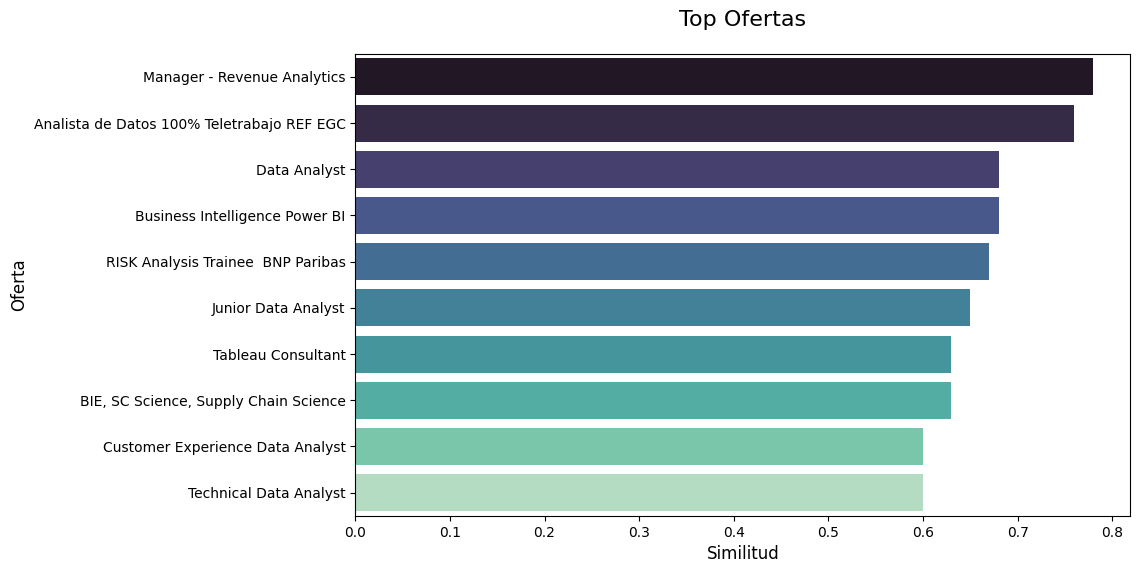

In [27]:
lista_detalles_ofertas = f_recomendador.detalles_ofertas_recomendades(ofertas_recomendadas, df)

Por último, juntamos todas las funciones en una para que se ejecute el recomendador de una sola vez pasandole únicamente la lista de skills del usuario y devolviendo las ofertas recomendadas en orden:

In [28]:
lista = f_recomendador.recomendador_hard_skills(skills_usuario)

Pinged your deployment. You successfully connected to MongoDB!
Datos obtenidos de MongoDB correctamente.

Matriz de habilidades creada correctamente.


Una vez tenemos la parte de las skills llamamos a la función final la cual tiene en cuenta otros parámetros como los años de experiencia del usuario, su nivel de inglés o el tipo de empleo que está buscando. Se filtran las ofertas devueltas por la función anterior en base a estos parámtros y se devuelve una lista final de ofertas.

In [29]:
skills_usuario = ['DevOps', 'Data Modeling', 'Salesforce']
f_recomendador.recomendador((0, 5), "C1", "data_science", skills_usuario)

Pinged your deployment. You successfully connected to MongoDB!
Datos obtenidos de MongoDB correctamente.

Matriz de habilidades creada correctamente.


[{'empleo': 'data_science',
  'plataforma': 'linkedin',
  'titulo_oferta': 'Data analyst (Tableau)',
  'empresa': 'Pepper Advantage',
  'fecha_publicacion': '5 days ago',
  'tipo_empleo': 'FULL_TIME',
  'descripcion': "About Pepper Group SpainPepper Group Spain is investing in the development of a loan servicing platform and broader eco system with the aspiration to provide the modular elements of the platform to internal and third party customers on a SaaS basis.About the roleAs a data analyst, you will be responsible for analyzing and interpreting complex data sets to provide insights and recommendations to the business. You will work closely with the data team to develop and maintain data models, dashboards, and reports using Tableau.Location: MadridMain ResponsibilitiesCollaborating with business stakeholders to understand their data needs and requirements. Developing and maintaining data models to support business reporting and analysis. Creating and maintaining Tableau dashboards